<a href="https://colab.research.google.com/github/15483114/uni9-estrelas/blob/main/estrelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dado o dataset de estrelas os objetivo deste notebook é prever o tipo de uma estrela.

In [209]:
import pandas as pd
# este é o caminho do meu dataset no google drive
df = pd.read_csv('/content/DATASET.csv', sep=';')

In [33]:
df.describe()

,Absolute magnitude(Mv),Star type
count,612.000000,612.000000
mean,4.027342,2.743464
std,7.686484,1.248714
min,-11.920000,0.000000
25%,0.150000,2.000000
50%,3.764087,3.000000
75%,10.375000,3.000000
max,20.060000,5.000000


In [34]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,7181,-,-,-0.595616,3,Yellowish,K
1,5391,2.12,1.2190000000000003,1.602394,3,Whitish,A
2,7751,9.02,1.8040000000000007,1.779173,3,Orange-Red,K
3,2600,0.0004,0.096,17.400000,0,Red,M
4,6486,5.48,1.1590000000000003,0.321518,3,Whitish,A
...,...,...,...,...,...,...,...
607,7221,7.44,1.8170000000000008,3.788960,3,Yellowish,K
608,6996,6.72,1.2730000000000004,5.334382,3,Whitish,A
609,5366,2.02,0.914,5.170938,3,yellow-white,F
610,3450,174000.0,1284.0,-11.280000,5,Red,M


O dataset aparenta ter hífens no lugar de Nan values, creio que seja importante tratar isso substituindo os valores.

In [145]:
import numpy as np
df = df.replace('-', np.nan)

In [146]:
# porcentagem de dados faltantes
df.isnull().mean().round(4)*100

Temperature (K)            9.80
Luminosity(L/Lo)          14.87
Radius(R/Ro)              14.05
Absolute magnitude(Mv)     0.00
Star type                  0.00
Star color                 9.80
Spectral Class             9.80
dtype: float64

<AxesSubplot:>

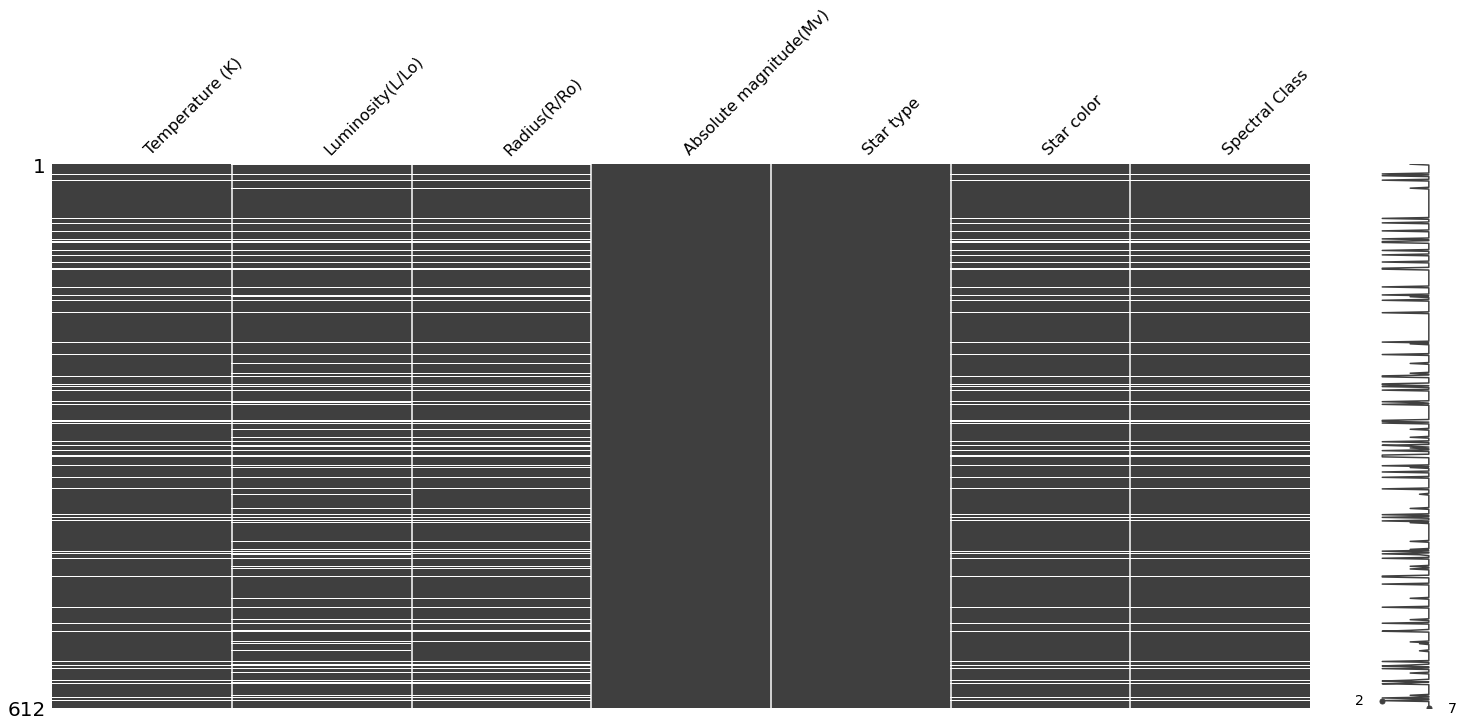

In [58]:
# mostrar dados faltantes
import missingno as ms
ms.matrix(df)

Star color e Spectral Class são duas colunas com dados faltantes e categóricas cujos valores não podem ser estimados com estatísticas simples como mediana e média. Para iniciar os estudos serão dorpadas e podem ser retomadas posteriomente.
As outras variáveis apesar de quantitativas podem induzir ao erro se substituídas por média ou mediana, apesar da quantidade de nan values ser maior de 5% para as colunas com algum dado faltante creio que qualquer tipo de tratamento possa alterar a qualidade dos dados por isso também serão dropadas.

In [147]:
df = df.dropna()

In [148]:
# porcentagem de dados faltantes
df.isnull().mean().round(4)*100

Temperature (K)           0.0
Luminosity(L/Lo)          0.0
Radius(R/Ro)              0.0
Absolute magnitude(Mv)    0.0
Star type                 0.0
Star color                0.0
Spectral Class            0.0
dtype: float64

O que fazer com dados categóricos?

In [149]:
df['Star color'].value_counts()

Red                   145
Blue                   76
Whitish                54
yellow-white           53
Orange-Red             46
Yellowish              38
yellowish              38
Blue-white             30
Blue White             12
White                   9
Yellowish White         6
white                   4
Blue white              3
Orange                  2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

Os nomes das cores se repetem porém por terem escritas diferentes são consideradas classes diferentes. 
Além disso, a cores que remetem ao amarelo e ao laranja parecem ser da mesma classe tentei juntar mas não consegui concluir esse tramento por falta de tempo, até porque ter um objeto de estudo em uma classe não ajuda muito o modelo.


In [151]:
df['cores'] = df['Star color'].str.replace('-','')

In [152]:
df['cores'] = df['cores'].str.replace(' ','')

In [153]:
df['cores'] = df['cores'].str.lower()

In [158]:
df['cores'].value_counts()

red                 145
blue                 77
yellowish            76
whitish              54
yellowwhite          53
bluewhite            47
orangered            46
white                13
yellowishwhite        6
orange                2
paleyelloworange      1
whiteyellow           1
Name: cores, dtype: int64

In [182]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,cores
1,5391,2.12,1.2190000000000003,1.602394,3,Whitish,0,8
2,7751,9.02,1.8040000000000007,1.779173,3,Orange-Red,4,3
3,2600,0.0004,0.096,17.400000,0,Red,5,5
4,6486,5.48,1.1590000000000003,0.321518,3,Whitish,0,8
5,12098,689.0,7.01,0.020000,3,Blue-white,0,1
...,...,...,...,...,...,...,...,...
607,7221,7.44,1.8170000000000008,3.788960,3,Yellowish,4,9
608,6996,6.72,1.2730000000000004,5.334382,3,Whitish,0,8
609,5366,2.02,0.914,5.170938,3,yellow-white,2,11
610,3450,174000.0,1284.0,-11.280000,5,Red,5,5


In [165]:
# X = df[0,1,2,3]
y = df['Star type']

In [ ]:
# utilizando one hot encoder nas cores
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Tive problemas para rodar o OneHotEncoder no colab, vou aplicar o label encoder nas cores e no spectral class

In [167]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['cores'] = le.fit_transform(df['cores'])
df['Spectral Class'] = le.fit_transform(df['Spectral Class'])

In [166]:
# transformando a classe em número
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Problema de classificação

Pelo Diagrama de Hertzsprung-Russell notamos clusters de estrelas com características semelhantes, como as white-dwarfs, main sequence e giants e super giants nesta seção será testado se métodos de classificação podem se assemelhar ao diagrama ou se é necessário utilizar outra abordagem, como por exemplo encontrar um modelo ideal para cada cluster e classificar as entrelas entre white-dwarf e não white dwarfs, main sequence ou não main sequence ...

# Random Forest

O promeiro modelo de classificação a ser testado será a árvore de decisão, uma vez que  são bastante eficientes em utilizar as features mais relevantes para realizar a classificação

In [193]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split (df[['Temperature (K)',	'Luminosity(L/Lo)',	'Radius(R/Ro)',	'Absolute magnitude(Mv)', 'Spectral Class']], y, test_size=0.2)
arv = DecisionTreeClassifier(max_depth = 3)

In [194]:
arv.fit(X_treino,y_treino)

DecisionTreeClassifier(max_depth=3)

In [195]:
#acuracia
acuracia_de_treino = arv.score(X_treino,y_treino)

In [196]:
acuracia_de_treino*100

91.58653846153845

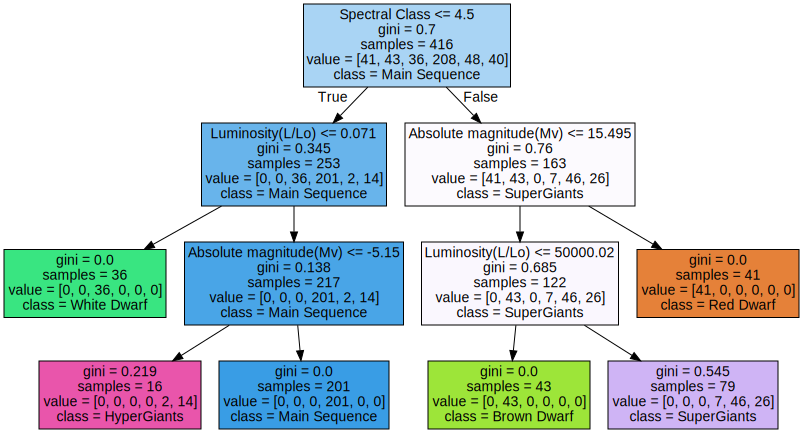

In [197]:
from sklearn.tree import export_graphviz
from graphviz import Source
dot_data = export_graphviz(arv, filled=True, feature_names = ['Temperature (K)',	'Luminosity(L/Lo)',	'Radius(R/Ro)',	'Absolute magnitude(Mv)', 'Spectral Class'], class_names=['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence' , 'SuperGiants',
'HyperGiants'])
Source(dot_data)

Apesar da variáveis categóricas terem sido apenas convertidas para números a acurácia final ficou boa.

# Random Forest

Como a árvore performou bem, é interessante testar várias árvores

In [198]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_treino, y_treino)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [200]:
y_pred = classifier.predict(X_teste)

In [202]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_teste, y_pred)
print(cm)
accuracy_score(y_teste, y_pred)

[[11  0  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0 51  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 11]]


1.0

O resultado do random forest é bastante esquisito, eu acho que não dá pra confiar num modelo com 100% de acuácia, é provável que esteja com overfitting.

# Logistic Regresion

Um modelo interessante para testar é a regressão logística, por causa da distribuição do main sequence no diagrama

In [203]:
import sklearn.linear_model as lm

rlog = lm.LogisticRegression()
rlog.fit(X_treino,y_treino)
acc_treino = rlog.score(X_treino, y_treino)
acc_treino*100

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


69.95192307692307

In [204]:
prev_teste = rlog.predict(X_teste)

In [205]:
from sklearn.metrics import accuracy_score

accuracy_score(y_teste, prev_teste)*100

65.71428571428571

array([[ 0,  0,  0, 11,  0,  0],
       [ 0,  0,  0, 11,  0,  0],
       [ 0,  0,  0, 14,  0,  0],
       [ 0,  0,  0, 51,  0,  0],
       [ 0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0, 11]])

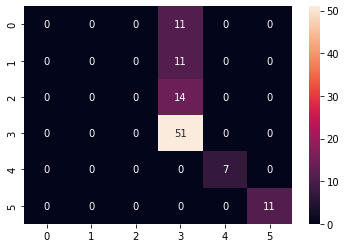

In [206]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
cm = confusion_matrix(y_teste, prev_teste)
sns.heatmap(cm,annot=True)
cm

O resultado não ficou muito bom, vou testar apenas com estrelas do main sequence

In [215]:
main = df

In [216]:
array=[]
for x in main['Star type']:
  variable = 1 if x==3 else 0
  array.append(variable)

main['main'] = array

In [217]:
main

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,cores,main
1,5391,2.12,1.2190000000000003,1.602394,3,Whitish,0,8,1
2,7751,9.02,1.8040000000000007,1.779173,3,Orange-Red,4,3,1
3,2600,0.0004,0.096,17.400000,0,Red,5,5,0
4,6486,5.48,1.1590000000000003,0.321518,3,Whitish,0,8,1
5,12098,689.0,7.01,0.020000,3,Blue-white,0,1,1
...,...,...,...,...,...,...,...,...,...
607,7221,7.44,1.8170000000000008,3.788960,3,Yellowish,4,9,1
608,6996,6.72,1.2730000000000004,5.334382,3,Whitish,0,8,1
609,5366,2.02,0.914,5.170938,3,yellow-white,2,11,1
610,3450,174000.0,1284.0,-11.280000,5,Red,5,5,0


In [218]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split (main[['Temperature (K)',	'Luminosity(L/Lo)',	'Radius(R/Ro)',	'Absolute magnitude(Mv)', 'Spectral Class']], main['main'], test_size=0.2)


In [219]:
import sklearn.linear_model as lm

rlog = lm.LogisticRegression()
rlog.fit(X_treino,y_treino)
acc_treino = rlog.score(X_treino, y_treino)
acc_treino*100

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


88.46153846153845

A acurácia considerando as classes main sequence e não main sequence ficou melhor do que tendo 6 classes diferentes, porém a acurácia não conseguiu superar a árvore de decisão.

# Conclusão

Esse dataset é bem explicado pelo diagrama de  Hertzsprung-Russell o que poupou a etapa de análise exploratória para entender melhor o dataset, porém ainda é uma etapa importante e pretendo fazer no futuro.

Os modelos escolhidos para a classificação foram a árvore de decisão, random forest e regressão logísitica, sendo o random forest o melhor resultado, porém suspeito, e a regressão logística apesar de mostrar bons resultados com classe ninária não conseguiu superar a árvore de decisão.